In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from proj1_helpers import *
from implementations import *
from plots import *
import pandas as pd
#from validation_utils import *
%load_ext autoreload
%autoreload 2

from utils import *
from validation import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [2]:
import datetime
DATA_TRAIN_PATH = 'C:/Users/saadc/Desktop/EPFL/ML/ML_course/projects/project1/scripts/data/train.csv' # TODO: download train data and supply path here

df_data = pd.read_csv('C:/Users/saadc/Desktop/EPFL/ML/ML_course/projects/project1/scripts/data/train.csv') 
labels, input_data, ids = load_csv_data(DATA_TRAIN_PATH)

In [3]:
# standardize the data : 
x, mean_x, std_x = standardize(input_data)
y, tx = build_model_data(x, labels)

In [4]:
print(f'shape y : {y.shape}, shape x : {tx.shape}')

shape y : (250000,), shape x : (250000, 31)


## Do your thing crazy machine learning thing here :) ...

In [5]:
# splitting data in train and test splits
seed = 46
ratio = 0.8
x_train, y_train, x_test, y_test = split_data(tx, y, ratio=ratio, seed=seed)

## Least Squares GD

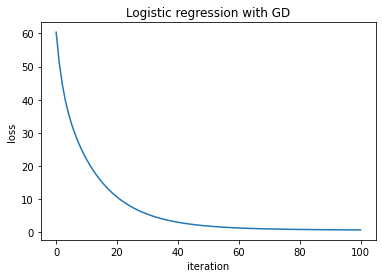

Train loss is 0.71
Test loss is 0.71


In [6]:
max_iters = 100
gamma = 0.01
initial_w = np.ones((x_train.shape[1]))

plt.title('Logistic regression with GD')
w, loss = least_squares_GD(y_train, x_train, initial_w, max_iters, gamma, plot_loss = True)
test_loss = compute_mse(y_test, x_test, w)
print("Train loss is {:.2f}".format(loss))
print("Test loss is {:.2f}".format(test_loss))

In [7]:
def cross_validation_demo():
    seed = 1
    degree = 0
    k_fold = 4
    bd_left = -5
    bd_right = -2
    gammas = np.logspace(bd_left, bd_right, 20)
    max_iters = 100
    initial_w = np.ones((x_train.shape[1]))
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []

    # cross validation
    for gamma in gammas:
        loss_train = []
        loss_test = []
        for k in range(k_fold):
            loss_tr, loss_te = cross_validation(type_='GD', y=y, x=tx, k_indices=k_indices, k=k, gamma = gamma, initial_w = initial_w, max_iters = max_iters, degree=0)
            loss_train.append(loss_tr)
            loss_test.append(loss_te)
        rmse_tr.append(np.mean(loss_train))
        rmse_te.append(np.mean(loss_test))

    cross_validation_visualization(gammas, rmse_tr, rmse_te, bd_left, bd_right)

cross_validation_demo()

KeyboardInterrupt: 

## Least Squares SGD

In [ ]:
max_iters = 100
gamma = 0.01
initial_w = np.ones((x_train.shape[1]))

plt.title('Logistic regression with GD')
w, loss = least_squares_SGD(y_train, x_train, initial_w, max_iters, gamma, plot_loss = True)
test_loss = compute_mse(y_test, x_test, w)
print("Train loss is {:.2f}".format(loss))
print("Test loss is {:.2f}".format(test_loss))

In [ ]:
def cross_validation_demo():
    seed = 1
    degree = 0
    k_fold = 4
    bd_left = -5
    bd_right = -2
    gammas = np.logspace(bd_left, bd_right, 20)
    max_iters = 100
    initial_w = np.ones((x_train.shape[1]))
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []

    # cross validation
    for gamma in gammas:
        loss_train = []
        loss_test = []
        for k in range(k_fold):
            loss_tr, loss_te = cross_validation(type_='SGD', y=y, x=tx, k_indices=k_indices, k=k, gamma = gamma, initial_w = initial_w, max_iters = max_iters, degree=0)
            loss_train.append(loss_tr)
            loss_test.append(loss_te)
        rmse_tr.append(np.mean(loss_train))
        rmse_te.append(np.mean(loss_test))

    cross_validation_visualization(gammas, rmse_tr, rmse_te, bd_left, bd_right)

cross_validation_demo()

## Least Squares

In [8]:
w, loss = least_squares(y, tx)
test_loss = compute_mse(y_test, x_test, w)
print("Train loss is {:.2f}".format(loss))
print("Test loss is {:.2f}".format(test_loss))

Train loss is 0.34
Test loss is 0.34


## Ridge regression

In [9]:
w, loss = ridge_regression(y, tx, lambda_=1e-5)
test_loss = compute_mse(y_test, x_test, w)
print("Train loss is {:.2f}".format(loss))
print("Test loss is {:.2f}".format(test_loss))

Train loss is 0.34
Test loss is 0.34


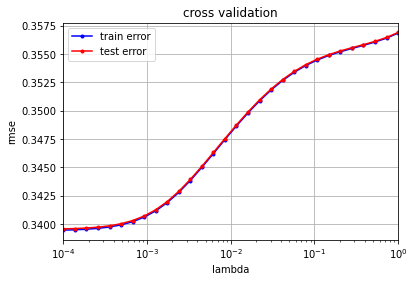

In [18]:
#cross_validation of ridge regression : 
def cross_validation_demo():
    seed = 1
    degree = 0
    k_fold = 5
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # cross validation:
    # *************************************************** 
    
    for lambda_ in lambdas:
        loss_tr=[]
        loss_te=[]
        for k in range(k_fold):
            loss_tr_k, loss_te_k = cross_validation(type_='RR', y=y, x=tx,  k_indices=k_indices, k=k, lambda_ = lambda_, gamma = None, initial_w = None, max_iters = None, degree=degree)
            loss_tr.append(loss_tr_k)
            loss_te.append(loss_te_k)
            
        rmse_tr.append(np.mean(loss_tr))
        rmse_te.append(np.mean(loss_te))
        
    cross_validation_viz(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

In [ ]:
#bias/variance decomposition : 
def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    lambdas = np.logspace(-4, 0, 30)
    degree=0
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(lambdas)))
    rmse_te = np.empty((len(seeds), len(lambdas)))
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        # ***************************************************
        # split data with a specific seed:
        # ***************************************************
        x_train,y_train,x_test,y_test = split_data(tx, y, ratio_train, seed)
        x_train_phi =  build_poly(x_train,degree)
        x_test_phi  =  build_poly(x_test,degree)
        for index_degree,lambda_ in enumerate(lambdas) :
            w_tr,_ = ridge_regression(y_train,x_train_phi,lambda_)
            rmse_te[index_seed,index_degree] = np.sqrt(2*compute_mse(y_test,x_test_phi,w_tr))
            rmse_tr[index_seed,index_degree] = np.sqrt(2*compute_mse(y_train,x_train_phi,w_tr))
            
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: 
        # ***************************************************
    bias_variance_decomposition_visualization(lambdas, rmse_tr, rmse_te)

bias_variance_demo()

## Logistic Regression

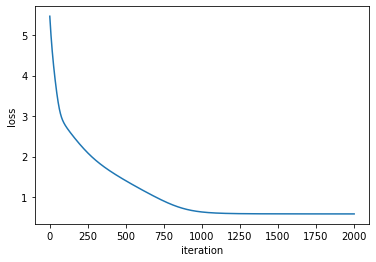

Train loss is 0.59
Test loss is 1.79


In [23]:
max_iters = 2000
gamma = 0.01
initial_w = np.ones((x_train.shape[1]))

w_log, loss = logistic_regression(y_train, x_train, initial_w, max_iters, gamma, plot_loss = True)
test_loss = compute_mse(y_test, x_test, w)
print("Train loss is {:.2f}".format(loss))
print("Test loss is {:.2f}".format(test_loss))

## Logistic Regression with Regularization

In [ ]:
max_iters = 1000
gamma = 0.1
initial_w = np.ones((x_train.shape[1]))
lambda_ = 1e-4

w, loss = reg_logistic_regression(y_train, x_train, lambda_, initial_w, max_iters, gamma, plot_loss = True)
print("Train loss is {:.2f}".format(loss))
print("Test loss is {:.2f}".format(test_loss))

## Cross validation on ridge regression

In [ ]:
def cross_validation_demo():
    seed = 1
    degree = 0
    k_fold = 4
    bd_left = -5
    bd_right = 4
    lambdas = np.logspace(bd_left, bd_right, 20)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []

    # cross validation
    for lambda_ in lambdas:
        loss_train = []
        loss_test = []
        for k in range(k_fold):
            loss_tr, loss_te = cross_validation(y, x, k_indices, k, lambda_, degree)
            loss_train.append(loss_tr)
            loss_test.append(loss_te)
        rmse_tr.append(np.mean(loss_train))
        rmse_te.append(np.mean(loss_test))

    cross_validation_visualization(lambdas, rmse_tr, rmse_te, bd_left, bd_right)

cross_validation_demo()

# Logistic Regression with GD:

In [ ]:
max_iters = 100
gamma = 0.1
initial_w = np.ones((tx.shape[1]))

plt.title('Logistic regression with GD')
w, loss = logistic_regression(y, tx, initial_w, max_iters, gamma, plot_loss = True)
print("Final loss is {:.2f}".format(loss))

## Logistic Regression + regularisation with GD: : 

In [ ]:
max_iters = 100
gamma = 0.1
lambda_ = 1
initial_w = np.ones((tx.shape[1]))

plt.title('Logistic regression + RL with GD')
w, loss = reg_logistic_regression(y, tx, lambda_, initial_w, max_iters, gamma, plot_loss = True)
print("Final loss is {:.2f}".format(loss))

# Look at the results : 


# 1. Split the data

In [ ]:
ratio = 0.7
tx_tr, tx_te, y_tr, y_te = split_data(tx, y, ratio)

# 2. Handle outliers 

# 3 Accuracy of the models

In [ ]:
#weights, loss = least_squares(y_tr, tx_tr)
y_pred = predict_labels(w_log, tx_te)
accu  = accuracy(y_pred,y_te)
print("accuracy:",accu)

# 4. Confusion matrix 

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
#confusion matrix
plt.figure(1)
cm=confusion_matrix(y_pred,y_te)
sn.heatmap(cm,annot=True)
plt.title("confusion matrix")
plt.xlabel("predicted")
plt.ylabel("expected")


## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = 'C:/Users/saadc/Desktop/EPFL/ML/ML_course/projects/project1/scripts/data/test.csv'  # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
weights = w_log
weights = weights[1:31]
y_prediction = predict_labels(weights, tX_test)
y_prediction.shape

In [ ]:
OUTPUT_PATH = 'C:/Users/saadc/Desktop/EPFL/ML/ML_course/projects/project1/scripts/data/pred.csv' # TODO: fill in desired name of output file for submission
create_csv_submission(ids_test, y_prediction, OUTPUT_PATH)